<h1>Invisibilité thermique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Présentation-du-problème" data-toc-modified-id="Présentation-du-problème-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Présentation du problème</a></span></li><li><span><a href="#Adimensionnement-et-formulation-variationnelle" data-toc-modified-id="Adimensionnement-et-formulation-variationnelle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adimensionnement et formulation variationnelle</a></span></li><li><span><a href="#Démarche" data-toc-modified-id="Démarche-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Démarche</a></span></li><li><span><a href="#1D-:-Simulation-du-problème-stationnaire" data-toc-modified-id="1D-:-Simulation-du-problème-stationnaire-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1D : Simulation du problème stationnaire</a></span><ul class="toc-item"><li><span><a href="#Programme-1-:-Résolution-en-dimension-1" data-toc-modified-id="Programme-1-:-Résolution-en-dimension-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Programme 1 : Résolution en dimension 1</a></span></li><li><span><a href="#Ordre-numérique-de-la-méthode-$\mathbb{P}1$." data-toc-modified-id="Ordre-numérique-de-la-méthode-$\mathbb{P}1$.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ordre numérique de la méthode $\mathbb{P}1$.</a></span></li><li><span><a href="#Programme-2-:-Résolution-du-même-problème-en-dimension-2" data-toc-modified-id="Programme-2-:-Résolution-du-même-problème-en-dimension-2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Programme 2 : Résolution du même problème en dimension 2</a></span></li></ul></li><li><span><a href="#2D-:-Premiers-calculs-de-flux-intégrés" data-toc-modified-id="2D-:-Premiers-calculs-de-flux-intégrés-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2D : Premiers calculs de flux intégrés</a></span></li><li><span><a href="#2D-:-Simulation-du-problème-stationnaire-avec-conductivité-constante-et-flux-non-constant" data-toc-modified-id="2D-:-Simulation-du-problème-stationnaire-avec-conductivité-constante-et-flux-non-constant-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2D : Simulation du problème stationnaire avec conductivité constante et flux non constant</a></span></li><li><span><a href="#2D-:-Simulation-du-problème-stationnaire-en-domaine-troué-fixe" data-toc-modified-id="2D-:-Simulation-du-problème-stationnaire-en-domaine-troué-fixe-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2D : Simulation du problème stationnaire en domaine troué fixe</a></span><ul class="toc-item"><li><span><a href="#Adaptation-de-la-géométrie" data-toc-modified-id="Adaptation-de-la-géométrie-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Adaptation de la géométrie</a></span></li><li><span><a href="#Adaptation-de-la-conductivité" data-toc-modified-id="Adaptation-de-la-conductivité-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Adaptation de la conductivité</a></span></li></ul></li><li><span><a href="#Simulation-du-problème-stationnaire-en-domaine-troué-aléatoirement" data-toc-modified-id="Simulation-du-problème-stationnaire-en-domaine-troué-aléatoirement-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Simulation du problème stationnaire en domaine troué aléatoirement</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Bibliographie" data-toc-modified-id="Bibliographie-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Bibliographie</a></span><ul class="toc-item"><li><span><a href="#FEniCS" data-toc-modified-id="FEniCS-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>FEniCS</a></span></li><li><span><a href="#Markdown" data-toc-modified-id="Markdown-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Markdown</a></span></li></ul></li></ul></div>

**Préliminaire** Les questions "sur papier" sont notées **Q** et les questions de programmation **P**.

# Présentation du problème

![caption](images/domaine1.png)

On va s'intéresser à l'équation de la chaleur sur un rectangle $\Omega=ABCD$ avec conditions aux limites mêlées et de terme source nul :


\begin{equation}\label{eq1:evol}
 \tag{P} \begin{cases}
   \rho c_{p} \partial_t \theta-div(\kappa\ grad(\theta))=0\mbox{ dans  }\Omega,\\
\theta(0,\cdot)=\theta_{0},\\(CL)
\begin{cases}
\kappa \partial_{n}\theta=0 \qquad \mbox{ sur }[AB]\\
 \theta=\theta^{0}\qquad \mbox{ sur }[BC]\\
\kappa_n\partial_{n}\theta=0 \qquad \mbox{ sur }[CD]\\
\kappa_n\partial_{n}\theta=\psi\qquad \mbox{ sur }[DA],\\
\end{cases}
  \end{cases}
\end{equation}


où les valeurs numériques sont


\begin{equation*}
\begin{cases}
X=d(A,B)=d(C,D)=20\,m\\
Y=d(B,C)=d(D,A)=10^{-2}\,m\\
\rho=4000\,kg.m^{-3}\\
c_{p}=1000\,J.kg^{-1}.K^{-1}\\
\theta^{0}=278\,K\\
\theta_{0}\mbox{ une fonction de moyenne }275\,K\\
\psi=
\psi_{0}=100 \, W.m^{-2}\\
\end{cases}
\end{equation*}

et $\kappa:(x,y)\mapsto diag(\kappa_x(x,y),\kappa_y(x,y))$, avec $\kappa_x$ et $\kappa_y$ deux fonctions données. On note $\kappa_n$ la diffusivité sur le bord par analogie avec la notation de la dérivée normale (on complètera la figure en explicitant la normale extérieure et $\kappa_n$ sur le bord).

Par ailleurs, l'équation d'évolution permet de décrire un régime
transitoire vers un état stationnaire solution de 


\begin{equation}\tag{Pinf}
  \begin{cases}
    -div(\kappa\ grad(\theta))=0\mbox{ dans  }\Omega,\\
(CL)  \end{cases}
\end{equation}

Le but de ce TP est de calculer numériquement la température sur le bord $[DA]$
et le flux de chaleur sur le bord $[BC]$ afin de comprendre comment valider de
manière croisée les simulations numériques et les solutions exactes en dimension 1, puis de calculer efficacement la température dans un domaine troué.

Dans un premier temps, on validera le modèle sur un cas de diffusion unidimensionnel, en $x$, en supposant que $\psi$ est constante égale à $\psi_{0}$, $\kappa=k I_2$ avec $k$ constante égale à $1\, W.m^{-1}.K^{-1}$ et que la température sur le bord $[BC]$ vaut uniformément $\theta_0$. 

**Q.1** Justifier cette affirmation, dans ce cas où $\kappa$, $\psi$ et $\theta_{0}$ sont des fonctions constantes : pourquoi peut-on considérer que la solution $\theta$ ne dépendra pas de $y$ ? 

**Solution** 



**Q.2** Réécrire le problème (P) en une dimension d'espace ($x$). On le numérotera (P1).

**Solution** 
 

**Q.3** Écrire le système stationnaire associé à (P1) et le résoudre explicitement. On notera $\theta^{\infty}$ la solution. 

**Solution** 


#  Adimensionnement et formulation variationnelle

**Q.1** Mettre (P) sous forme adimensionnée par rapport à un temps d'observation $T_{obs}$, une longueur d'observation en $x$, $X_{obs}$, une longueur d'observation en $y$, $Y_{obs}$ et une température $\theta_{obs}$. 

On aura ainsi une équation d'évolution sous la forme

\begin{equation}\label{eq1:evol_adim}
\tag{Padim}\begin{cases}
\partial_{t^{*}}\theta^{*}-\partial_{x^*}(\kappa_{x}^{*}\partial_{x^{*}}\theta^{*})-\partial_{y^*}(\kappa_{y}^{*}\partial_{y^{*}}\theta^{*})=0\mbox{ dans }\Omega^{*}\\
(CL)^{*}
\begin{cases}
\kappa^*_n\partial_{n^{*}}\theta^{*}=0 \qquad \mbox{ sur }[A^{*}B^{*}]\\
\theta^{*}=\theta_0/\theta_{obs} \qquad \mbox{ sur }[B^{*}C^{*}]\\
\kappa^*_n\partial_{n^{*}}\theta^{*}=0 \qquad \mbox{ sur }[C^{*}D^{*}]\\
\kappa^*_n\partial_{n^{*}}\theta^{*}=\psi^{*} \qquad \mbox{ sur }[D^{*}A^{*}],\\
\end{cases}
\end{cases}
\end{equation}

où les quantités étoilées sont adimensionnées et $\kappa_x^*$, $\kappa_{y}^{*}$ et $\kappa_{n}^{*}$ sont les constantes de diffusivité thermiques adimensionnées dans chaque direction $x$, $y$ et normale au bord.

**Solution** 

Par souci de simplification, on omet les ${}^{*}$ et ${}_{obs}$ dans la suite. On suppose
désormais que $\psi\in L^2([DA])$. Dans la suite, on considère que $\theta_0$ est une fonction constante et vaut $\theta_{obs}$.

**Q.2** Écrire le problème stationnaire associé à (Padim). On le nommera (Padiminf).

**Solution** 

**Q.3** Ecrire la formulation variationnelle de (Padiminf). La solution est-elle unique ?

**Solution** 

#  Démarche

On veut approcher la solution d'un problème d'équations aux dérivées
partielles, dont on sait qu'il est bien posé grâce à l'analyse, à l'aide d'une
méthode éléments finis. 

"Approcher"  peut signifier plusieurs choses :
on veut visualiser, déterminer l'ordre numérique, etc. 

La démarche est la suivante (les étapes sont numérotées Ci pour étape i du code) : 
- C0 : on charge les modules nécessaires ;
- C1 : on définit les constantes ;
- C2 : on part d'une géométrie en définissant les bords par des courbes paramétrées : les bords extérieurs étant parcourus **dans le sens trigonométrique** et les bords intérieurs **dans le sens horaire** ;
- C3 : on fabrique un maillage ;
- C4 : on définit l'espace dans lequel on va chercher la solution approchée ;
- C5 : on prend en compte les conditions au bord ;
- C6 : on définit la formulation variationnelle ;
- C7 : on résout le système ;
- C8: on exploite la solution.

Dans la suite sont fournis des programmes. On les analysera précisément par
rapport aux étapes décrites ci-dessus. 

#  1D : Simulation du problème stationnaire

On détaille dans la première partie de cette section un premier programme permettant de résoudre un problème approché en dimension 1, puis l'objectif est que vous arriviez à écrire vous-même un code de résolution.

## Programme 1 : Résolution en dimension 1

<p style="color:red;">     C0 : Chargement des modules </p>

In [1]:
from dolfin import *

In [2]:
from fenics import *
import matplotlib.pyplot as plt

<p style="color:red;"> C1 : Définition des constantes </p>

On fixe les constantes, le flux à gauche $\psi$ et la précision $tol$.

In [3]:
kappaadim=1
psiadim=1
tol = 1E-14

<p style="color:red;"> C2 : Définition de la géométrie </p>  

Il s'agit d'un segment de longueur adimensionnée 1.

In [4]:
X=1

<p style="color:red;"> C3 : Fabrication du maillage </p>

Plotting a UnitIntervalmesh1


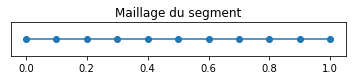

In [5]:
nx1 = 10

mesh1 = UnitIntervalMesh(nx1)

print("Plotting a UnitIntervalmesh1")
plt.figure(1)
plot(mesh1, title="Maillage du segment")

<p style="color:red;"> C4 : Définition de l'espace Hh dans lequel on va chercher la solution </p>

In [6]:
Hh1 = FunctionSpace(mesh1, 'P', 1)

<p style="color:red;"> C5 : Prise en compte des conditions au bord </p>

Les conditions au bord de Dirichlet sont à spécifier grâce à la commande FEniCS DirichletBC. Comme vu en cours, les conditions au bord de Neumann nécessitent de définir une mesure specifique sur la portion de bord concernée. Il faut donc définir les parties de bord comme des objets.

In [7]:
# Définition des bords d'intérêt, de la condition de Dirichlet 
# et de la mesure nécessaire pour définir l1 (Neumann non homogène sur le bord gauche)

def RightEdge1(x, on_boundary):
    return on_boundary and (abs(x[0] - 1) < tol) 

bcD1 = DirichletBC(Hh1, Constant(2.0), RightEdge1)

class LeftEdge1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)

bcN1 = LeftEdge1()

boundaries1 = MeshFunction("size_t", mesh1, mesh1.topology().dim()-1, 0)

bcN1.mark(boundaries1,0) # on donne le label 0 au bord x=0 dans boundaries1

ds1 = Measure("ds", domain=mesh1, subdomain_data=boundaries1) 

<p style="color:red;"> C6 : Codage de la formulation variationnelle </p>

In [8]:
u1 = TrialFunction(Hh1)
v1 = TestFunction(Hh1)
l1 = psiadim*v1*ds1(0) #psiadim*v1(0) car ds1(0) est la mesure ds1 en x=0 (label 0)
a1 = kappaadim*dot(grad(u1), grad(v1))*dx

<p style="color:red;"> C7 : Résolution de l'approximation variationnelle (assemblage de la matrice de rigidité et résolution du système linéaire) </p>

In [9]:
u1 = Function(Hh1)
solve(a1 == l1, u1, bcD1)

<p style="color:red;"> C8 : Tracé de la solution </p>

Text(0.5, 0, 'x')

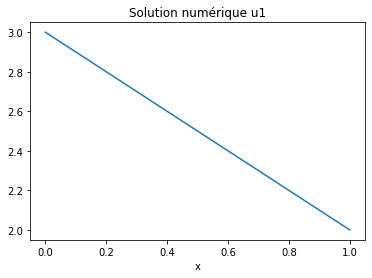

In [10]:
plt.figure(2)
plot(u1,title='Solution numérique u1')
plt.xlabel('x')

**Q.1** Quelle quantité visualise-t-on ? 

**Solution** 

**Q.2** Quel est le problème approché résolu ?

**Solution** 

On peut obtenir la matrice de rigidité en utilisant la commande *assemble*, qui donne la matrice de rigidité sur tous les noeuds du maillage **quelles que soient les conditions au bord**. Attention, pour tenir compte de la condition au bord de Dirichlet, il faut l'appliquer en utilisant *condition_au_bord.apply*. 

In [11]:
A1=assemble(a1)
b1=assemble(l1)
print(A1.array())
print(b1.get_local())
bcD1.apply(A1,b1)
print(A1.array())
print(b1.get_local())
coordinates =  mesh1.coordinates()
print(coordinates)

[[ 10. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  20. -10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  20. -10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. -10.  10.]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.

## Ordre numérique de la méthode $\mathbb{P}1$. 

**Q.1** Comment valider numériquement l'approximation variationnelle, sachant le résultat de la  Q.6 de la partie 1 ?

**Solution** 

**P.1** Tracer la différence entre la solution du problème approché et la fonction thetainf = Expression("2-x[0]", degree=2). 

Mots-clés FEniCS : *Expression*

In [12]:
# %load P_4_2_1.py


**P.2** Calculer le logarithme en base 10 de la norme $L^2$ et la norme $H^1$ de l'erreur.

Mots-clés FEniCS : *norm*

In [13]:
# %load P_4_2_2.py


**Q.2** Expliquer ce résultat.

**Solution** 

**Remarque** Il est en général plus prudent de considérer l'erreur relative norm(u-thetainf,'H1')/norm(thetainf,'H1'). Ici, norm(thetainf,'H1') étant d'ordre 1, c'est inutile.

**P.3** On suppose jusqu'à la fin de cette section seulement que la source  $S$ est non nulle. On suppose dans cette question seulement que $S$ est uniforme égale à 1 sur tout le domaine. La solution exacte est alors $\theta_{ex}:x\mapsto \theta^\infty(x) + (1-x^2)/2$. Coder la résolution par la méthode $\mathbb{P}1$ sous forme d'une fonction appelée error_p1 prenant en entrée le nombre de mailles nx et rendant en sortie la norme H1 de l'erreur commise.

Mots-clés FEniCS : *SpatialCoordinate*, *conditional* (langage UFL)

In [14]:
# %load P_4_2_3.py


**P.4** Calculer les erreurs commises pour nx = 8, 16, 32, 64, 128, 256, 512 et 1024. Tracer la courbe des résultats en mettant en abscisse le logarithme en base 10 de nx.

In [15]:
# %load P_4_2_4.py


**P.5** Donner une estimation de l'ordre numérique de la méthode pour ce problème.

In [16]:
# %load P_4_2_5.py


**P.6** Modifier le programme écrit en P.3 pour inclure les sources & solutions exactes $S:x\mapsto -\pi\sin(\pi x)$ & $\theta_{ex}:x\mapsto  1-\sin(\pi x)/\pi$  et $S:x\mapsto 8 H(x-1/2)$ & $\theta_{ex}:x\mapsto  -x+3-1_{x>1/2}(2x-1)^2$. Conclure.

**Solution** 

## Programme 2 : Résolution du même problème en dimension 2

On revient au problème initial (Padiminf) où la source est nulle. On va maintenant définir la géométrie complète du domaine initial en deux dimensions d'espace.

Voici le code en dimension 2.

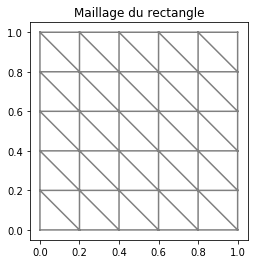

In [17]:
#C0
#from dolfin import *
#from __future__ import print_function
#from fenics import *
#import matplotlib.pyplot as plt

#C1
#kappaadim=1
#psiadim=1
#tol = 1E-14

#C2
#X=1
Y=1

#C3
nx2=5
ny2=5 

mesh2 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx2, ny2, diagonal="left") 

plt.figure(1)
plot(mesh2, title="Maillage du rectangle")

#C4
Hh2 = FunctionSpace(mesh2, 'P', 1)

#C5

def RightEdge2(x, on_boundary):
    return on_boundary and (abs(x[0] - 1) < tol) 
    
reD2 = DirichletBC(Hh2, Constant(1.0), RightEdge2)

class LeftEdge2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN2 = LeftEdge2()

boundaries2 = MeshFunction("size_t", mesh2, mesh2.topology().dim()-1, 0)

leN2.mark(boundaries2, 1)

ds2 = Measure("ds", domain=mesh2, subdomain_data=boundaries2)

**P.1** Ecrire la formulation variationnelle du problème (Padiminf) (étape C6) et tracer la solution.

In [18]:
# %load P_4_3_1.py


**P.2** Résoudre l'approximation variationnelle (étape C7).

In [19]:
# %load P_4_3_2.py


**P.3** Tracer la solution (étape C8).

In [20]:
# %load P_4_3_3.py


**Q.1** Comment jouer sur le maillage pour se convaincre que la solution ne dépend pas de $y$ ?

**Solution** 

**P.4** Comment implémenter la méthode $\mathbb{P}2$ ?

**Solution** 

**P.5** La solution vous paraît-elle visuellement correcte (on pourra tracer le gradient de $u$) ?

Mots-clés FEniCS : *grad*

In [21]:
# %load P_4_3_5.py


# 2D : Premiers calculs de flux intégrés

Le flux intégré sur un bord est l'intégrale sur ce bord de la dérivée normale de la température.

**Q.1** Quelle est la valeur du flux intégré en $x=0$ ? 

**Solution** 

**Q.2** Quelle est la valeur du flux intégré en $x=X$ ? 

**Solution** 

**P.1** Ecrire un code permettant de calculer le flux intégré sur le segment [DA], que l'on appellera influx, et le flux intégré sur le segment [BC], que l'on appellera outflux. On calculera la valeur absolue de la différence.

Mots-clés FEniCS : *assemble*, *mark*

In [22]:
# %load P_5_1.py


**Q.3** Conclure.

**Solution**

**Remarque** On a besoin de définir le bord droit *RightEdge* comme une classe pour pouvoir l'étiqueter ensuite comme sous-domaine et intégrer sur ce bord.

#  2D : Simulation du problème stationnaire avec conductivité constante et flux non constant

On introduit une fonction flux $\psi:y\mapsto \psi_{adim}y$.

**P.1** Introduire la fonction $\psi$ dans le programme 2. On tracera le maillage et la solution comme des sous-figures.

Mots-clés matplotlib : *subplot*, *colorbar* 

In [ ]:
# %load P_6_1.py


**P.2** Estimer l'ordre numérique de la méthode $\mathbb{P}1$ et de la méthode $\mathbb{P}2$ pour ce problème. Comme la solution explicite n'est pas connue, on aura choisi nx4 et ny4 grands, par exemple égaux à 200, et on comparera les solutions calculées pour des nx et ny plus petits à la solution obtenue sur le maillage fin mesh4. 

Mots-clés FEniCS : *linregress*

In [ ]:
# %load P_6_2.py


**P.3** Donner le flux thermique sur la face $x=0$ et sur la face $x=X$. Ce résultat était-il prévisible ?

In [ ]:
# %load P_6_3.py


**Solution** 

**Q.3** Conclure.

**Solution** 

#  2D : Simulation du problème stationnaire en domaine troué fixe

![caption](images/domaine2.png)

## Adaptation de la géométrie

Dans un premier temps, on va considérer que le domaine $\Omega'$ comporte un trou central circulaire **isolé** de rayon $r$ sur le bord duquel on met donc des conditions de Neumann homogènes. 


Afin de pouvoir comparer sur des maillages de même taille de cellule, on fixe maintenant la taille du domaine, la position et la taille du trou, ainsi que le nombre de mailles par côté et l'ordre de la méthode. 

In [24]:
xc=X/2
yc=Y/2
r=0.1

nx5=15
ny5=15
ordre = 1

**P.1** Définir le nouveau domaine et le mailler.

Mots-clés FEniCS : *Rectangle(Point(.,.),Point(.,.))*, *Circle(Point(.,.),.)*, *generate_mesh*

In [25]:
# %load P_7_1_1.py


**P.2** Résoudre le problème sur le nouveau domaine.

In [26]:
# %load P_7_1_2.py


**P.3** Comparer les flux intégrés sur la face $x=0$ et sur la face $x=L$ obtenus avec des éléments finis $\mathbb{P}1$ puis $\mathbb{P}2$ et commenter le résultat.

In [27]:
# %load P_7_1_3.py


## Adaptation de la conductivité

On considère à présent le domaine sans trou $\Omega$ et on introduit une conductivité variable ${\kappa_{var}:(x,y)\mapsto (\kappa-10^{-8})\mathbf{1}_{\{(x,y)\in\Omega \,:\, (x-X/2)^{2}+(y-Y/2)^{2}>r^{2}\}}}+10^{-8}$.

**P.1** Coder la deuxième approche.

Mots-clés FEniCS : *SpatialCoordinate*, *conditional*

In [28]:
# %load P_7_2_1.py


**P.2** Calculer la différence des flux intégrés calculés par chacune des deux approches. 

*Remarque* La différence de flux obtenue par
la méthode de conductivité variable est beaucoup plus stable par rapport à la
variation du rayon que la méthode du
changement
de géométrie, qui demande des remaillages et augmente le conditionnement de la matrice. 

In [29]:
# %load P_7_2_2.py


**P.3** Créer un autre maillage troué avec un rayon de trou légèrement plus grand et interpoler les solutions u5 et u6 sur ce domaine. Tracer la différence. Conclure.

In [30]:
# %load P_7_2_3.py


**Q.1** Pourquoi met-on la conductivité à $10^{-8}$ dans le trou ? Essayer avec $0$.

**Solution**

# Simulation du problème stationnaire en domaine troué aléatoirement

On veut maintenant simuler le problème dans un domaine dont le nombre de trous, le rayon des trous et les coordonnées de leur centre suivent respectivement une loi de Poisson de paramètre 5, une loi exponentielle de paramètre 5 et une loi normale de moyenne le centre du domaine et de variance 0.1.

In [31]:
param_poisson = 5
scale_exp = 1/5
var_c = 0.1
nx8 = 100
ny8 = 100
ordre = 2

**P.1** Tirer le nombre de trous, leur rayon et les coordonnées de leur centre.

Mots-clés numpy : *poisson*, *exponential*, *normal*

In [32]:
# %load P_8_1.py


**P.2** Définir la conductivité adaptée et la tracer.

In [33]:
# %load P_8_2.py



**P.3** Résoudre le problème.

In [34]:
# %load P_8_3.py



**P.4** Peut-on encore parler d'invisibilité thermique ?

In [35]:
# %load P_8_4.py



# Conclusion

A vous d'écrire vos propres conclusions...

# Bibliographie

## FEniCS

Documentation : https://fenicsproject.org/documentation/

Getting started : http://www-users.math.umn.edu/~arnold/8445/fenics-getting-started.pdf

UFL : https://fenics.readthedocs.io/projects/ufl/en/latest/manual/form_language.html



## Markdown

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

